<a href="https://colab.research.google.com/github/auab/Customer-Analysis/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction 


Understand the costumer is very important for any company, from these who creates the product to the ones who creates the advertises. In the customer-centric culture, the data plays a big role in this process of knowing the client and one technique used in this task is the **customer segmentation**.

The idea of this project is to create a customer segmentation using a dataset avaiable in kaggle, describe the steps taken and choices made  and discuss the obtained result.

## Segmentation
<strong><em>Definition</strong>: Segmentation is a process of taxonomy, a way to divide something into parts, a way to divide market into sub-markets</em>

Here we'll use data to define the numbers of segments and how they are divided, but it could also be done by a business rule, like *highest use*, *medium use* and *low use* of a specific product.

### Why segement?
It was said in the beginning that a segmentation is important to understand the customer, but how it can be used? *Grigsby* (2018) lists thre typical uses of segmentation: finding similar members, making modelling better and using marketing strategy to attack each segment differently.

Know the prupose of the segmentation is important for the steps that will be taken and for the results discussion. Here we'll consider that the result of the segmentation will be used for marketing strategy, more specifically, advertisement purposes

## The dataset
The dataset used here was extracted from Kaggle and it's available (with data description) in <a href="https://www.kaggle.com/imakash3011/customer-personality-analysis">here</a>. I also made it available the <a href='https://github.com/auab/Customer-Analysis'>github repository</a> of this project

### Dataset description

The database is divided in three types of features: 
* **People**: it contains mainly demographic features
* **Products**: the ammount spent in a specific product category in the last two years
* **Promotion**: the customer response to promotions campaings
* **Places**: the place where the customer buys the product

The deatiled description including the features names is presented below:


**People**

ID: Customer's unique identifier<br />
Year_Birth: Customer's birth year<br />
Education: Customer's education level<br />
Marital_Status: Customer's marital status<br />
Income: Customer's yearly household income<br />
Kidhome: Number of children in customer's household<br />
Teenhome: Number of teenagers in customer's household<br />
Dt_Customer: Date of customer's enrollment with the company<br />
Recency: Number of days since customer's last purchase<br />
Complain: 1 if the customer complained in the last 2 years, 0 otherwise<br /><br />

**Products**

MntWines: Amount spent on wine in last 2 years<br />
MntFruits: Amount spent on fruits in last 2 years<br />
MntMeatProducts: Amount spent on meat in last 2 years<br />
MntFishProducts: Amount spent on fish in last 2 years<br />
MntSweetProducts: Amount spent on sweets in last 2 years<br />
MntGoldProds: Amount spent on gold in last 2 years<br /><br />


**Promotion**


NumDealsPurchases: Number of purchases made with a discount<br />
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br />
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br />
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br />
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br />
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br />
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br /><br />


**Place**


NumWebPurchases: Number of purchases made through the company’s website<br />
NumCatalogPurchases: Number of purchases made using a catalogue<br />
NumStorePurchases: Number of purchases made directly in stores<br />
NumWebVisitsMonth: Number of visits to company’s website in the last month

# Initial Imports

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
import plotly.graph_objects as go
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_data = pd.read_csv('https://raw.githubusercontent.com/auab/Customer-Analysis/main/marketing_campaign.csv',sep='\t')
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# 2. Exploratory Analysis


The first step is see if there are NA variables and outliers. Depending on how many they are, a differente approach will be used to deal with it

In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The analysis show that the **Income** column has NA, values. Since they are not so many, the treatment choosen here is simply drop the rows.

In [4]:
customer_data=customer_data.dropna(subset=['Income'])

A way to observe if there are outlier instances is to plot histograms and analyze how they are depicted. The expected format for a graph without outliers is an historgram with bars very close to each other ocuppying almost all the x-axis intervals presented in the figure (assuming that the x-axis range was set considering the max. and min. value of the feature).

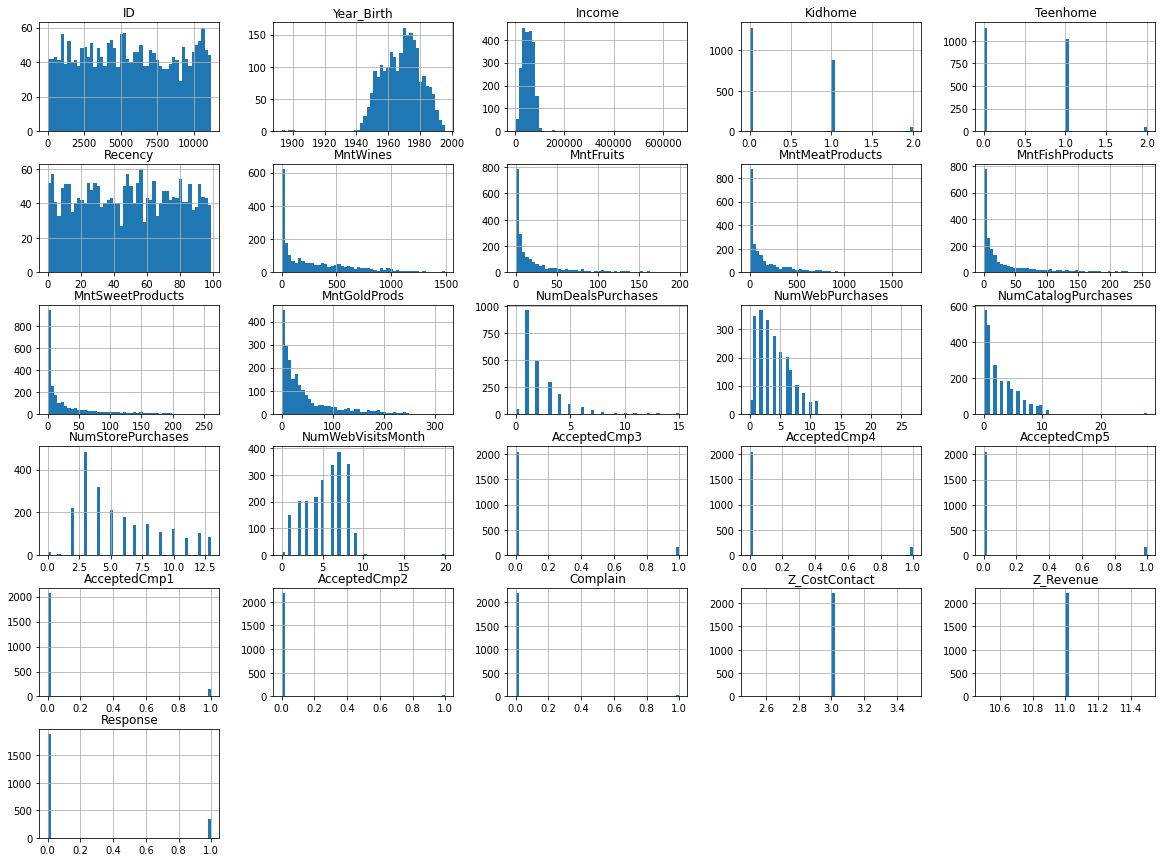

In [5]:
customer_data.hist(bins=50, figsize=(20,15))
plt.show()

Such graphs indicates different treatments for each case. Each feature demands a new graph to understand the situation. Let's start with Year_Birth

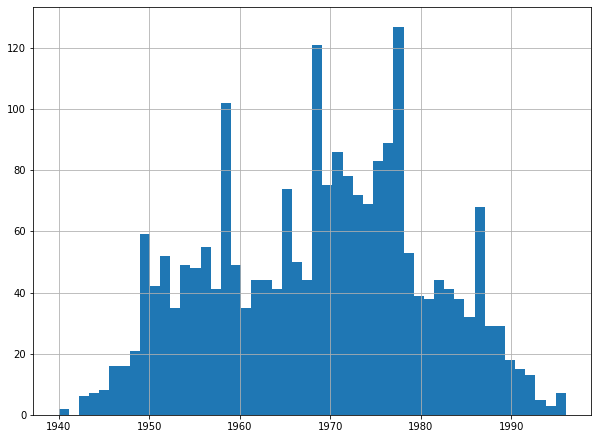

There are 0 abnormal birth years


In [25]:
customer_data['Year_Birth'].hist(bins=50, figsize=(10,7.5))
plt.show()
abnormal_birth_year = len(customer_data[customer_data['Year_Birth']<1910])
print('There are '+str(abnormal_birth_year)+' abnormal birth years')

Since there are only 3 values, we can drop the instances without great harm.

In [19]:
customer_data = customer_data[customer_data['Year_Birth']>1910]

The next is Income

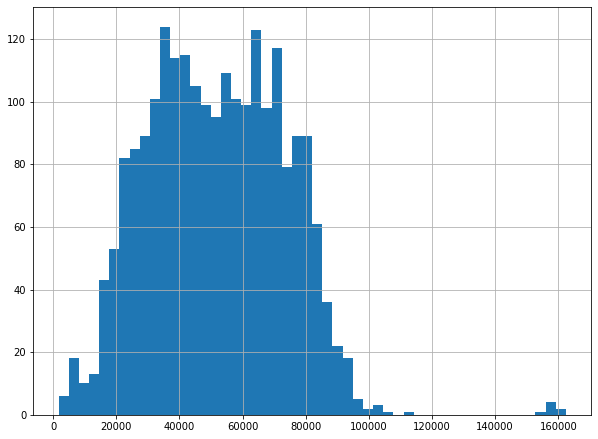

There are 0 abnormal income values


In [24]:
customer_data['Income'].hist(bins=50, figsize=(10,7.5))
plt.show()
abnormal_income = len(customer_data[customer_data['Income']>600000])
print('There are '+str(abnormal_income)+' abnormal income values')

Only 1 instance. Drop again.

In [23]:
customer_data = customer_data[customer_data['Income']<600000]

In [ ]:
current_year = datetime.datetime.now().year
customer_data = customer_data.apply(lambda feature: current_year - feature if feature.name == 'Year_Birth' else feature).\
                              rename(columns={'Year_Birth':'Age'})

Also, can be seen that there are some outliers in this column, they will also be removed in a first analysis.

In [ ]:
customer_data=customer_data[customer_data['Income']<600000]

Now we'll create newfeatures to make easier the next steps

In [ ]:
customer_data['Spending'] = customer_data[['MntFruits','MntWines','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)
customer_data['Seniority']=pd.to_datetime(customer_data['Dt_Customer'], dayfirst=True,format = '%d-%m-%Y')
today = datetime.date.today()
customer_data['Seniority'] = pd.to_numeric(customer_data['Seniority'].dt.date.apply(lambda x: (today - x)).dt.days, downcast='integer')/30
customer_data.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'},inplace=True)
customer_data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'},inplace=True)
customer_data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'},inplace=True)
customer_data['Children']=customer_data[['Kidhome','Teenhome']].sum(axis=1)
customer_data['Has_child'] = np.where(customer_data['Children']> 0, 'Has child', 'No child')
customer_data=customer_data.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

In [ ]:
customer_data=customer_data[['Age','Education','Marital_Status','Income','Spending','Seniority','Has_child','Children','Wines','Fruits','Meat','Fish','Sweets','Gold']]
customer_data.head()


,Age,Education,Marital_Status,Income,Spending,Seniority,Has_child,Children,Wines,Fruits,Meat,Fish,Sweets,Gold
0,64,Postgraduate,Alone,58138.0,1617,113.266667,No child,0,635,88,546,172,88,88
1,67,Postgraduate,Alone,46344.0,27,94.933333,Has child,2,11,1,6,2,1,6
2,56,Postgraduate,In couple,71613.0,776,101.566667,No child,0,426,49,127,111,21,42
3,37,Postgraduate,In couple,26646.0,53,95.800000,Has child,1,11,4,20,10,3,5
4,40,Postgraduate,In couple,58293.0,422,96.533333,Has child,1,173,43,118,46,27,15


# Clustering

To take a look at the clustering of clients in the dataset, I’ll define the segments of the clients. Here we will use 4 equally weighted customer segments:

Stars: Old customers with high income and high spending nature.

Neet Attention: New customers with below-average income and low spending nature. 

High Potential: New customers with high income and high spending nature.

Leaky Bucket: Old customers with below-average income and a low spending nature.

In [ ]:
scaler=StandardScaler()
dataset_temp=customer_data[['Income','Seniority','Spending']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')

gmm=GaussianMixture(n_components=4, covariance_type='spherical',max_iter=2000, random_state=5).fit(X)
labels = gmm.predict(X)
dataset_temp['Cluster'] = labels
dataset_temp=dataset_temp.replace({0:'Stars',1:'Need attention',2:'High potential',3:'Leaky bucket'})
customer_data = customer_data.merge(dataset_temp.Cluster, left_index=True, right_index=True)

pd.options.display.float_format = "{:.0f}".format
summary=customer_data[['Income','Spending','Seniority','Cluster']]
summary.set_index("Cluster", inplace = True)
summary=summary.groupby('Cluster').describe().transpose()
summary.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Cluster       High potential  Leaky bucket  Need attention  Stars
Income count             584           641             528    462
       mean            34757         37705           69542  73438
       std             12075         12397           12006  13753
       min              2447          1730           44802  49090
       25%             26489         28839           60880  65298

In [ ]:
PLOT = go.Figure()
for C in list(customer_data.Cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = customer_data[customer_data.Cluster == C]['Income'],
                                y = customer_data[customer_data.Cluster == C]['Seniority'],
                                z = customer_data[customer_data.Cluster == C]['Spending'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Seniority', titlefont_color = 'black'),
                                zaxis=dict(title = 'Spending', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

# Data Preparation for Customer Personality Analysis

Now I will prepare the data for the Apriori algorithm. Here I will be defining three segments of the customers according to the age, income and seniority:

In [ ]:
#Create Age segment
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 65, 120]
customer_data['Age_group'] = pd.cut(customer_data['Age'], bins=cut_bins, labels=cut_labels_Age)
#Create Income segment
cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
customer_data['Income_group'] = pd.qcut(customer_data['Income'], q=4, labels=cut_labels_Income)
#Create Seniority segment
cut_labels_Seniority = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
customer_data['Seniority_group'] = pd.qcut(customer_data['Seniority'], q=4, labels=cut_labels_Seniority)
customer_data=customer_data.drop(columns=['Age','Income','Seniority'])

Now I will define new segments according to the spending of customers on each product which will be based on:

Non Buyer

Low Buyer

Frequent Buyer

Biggest Buyer

In [ ]:
cut_labels = ['Low consumer', 'Frequent consumer', 'Biggest consumer']
customer_data['Wines_segment'] = pd.qcut(customer_data['Wines'][customer_data['Wines']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
customer_data['Fruits_segment'] = pd.qcut(customer_data['Fruits'][customer_data['Fruits']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
customer_data['Meat_segment'] = pd.qcut(customer_data['Meat'][customer_data['Meat']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
customer_data['Fish_segment'] = pd.qcut(customer_data['Fish'][customer_data['Fish']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
customer_data['Sweets_segment'] = pd.qcut(customer_data['Sweets'][customer_data['Sweets']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
customer_data['Gold_segment'] = pd.qcut(customer_data['Gold'][customer_data['Gold']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
customer_data.replace(np.nan, "Non consumer",inplace=True)
customer_data.drop(columns=['Spending','Wines','Fruits','Meat','Fish','Sweets','Gold'],inplace=True)
customer_data = customer_data.astype(object)

# Apriori Algorithm

The Apriori algorithm is the simplest technique to identify the underlying relationships between different types of elements. The idea behind this algorithm is that all nonempty subsets of a frequent category must also be frequent. Here I will be using the Apriori algorithm for the task of customer personality analysis with Python. Here I will use this algorithm to identify the biggest customer of wines:

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format
association=customer_data.copy() 
df = pd.get_dummies(association)
min_support = 0.08
max_len = 10
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

product='Wines'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9357,"(Cluster_Need attention, Education_Postgraduate, Age_group_Mature)",(Wines_segment_Biggest consumer),0.121,0.249,0.084,0.698,2.805,0.054,2.486
4858,"(Income_group_High income, Cluster_Need attention)",(Wines_segment_Biggest consumer),0.121,0.249,0.084,0.697,2.800,0.054,2.476
4854,"(Cluster_Need attention, Age_group_Mature)",(Wines_segment_Biggest consumer),0.130,0.249,0.090,0.692,2.782,0.058,2.439
4872,"(Seniority_group_Old customers, Cluster_Need attention)",(Wines_segment_Biggest consumer),0.123,0.249,0.085,0.691,2.779,0.054,2.433
9385,"(Cluster_Need attention, Meat_segment_Biggest consumer, Education_Postgraduate)",(Wines_segment_Biggest consumer),0.122,0.249,0.081,0.664,2.670,0.051,2.237


Conclusion
So according to the output and overall analysis conducted on this data science project on customer personality analysis with Python, we can conclude that the biggest customers of wines are:

Customers with an average income of around $69,500.

Customers with an average total spend of approximately $1,252.

Customers registered with the company for approximately 21 months.

Customers with a graduate degree.

And customers who are also heavy consumers of meat products.

# Bibliography

Grigsby, M. (2018). Marketing Analytics: A Practical Guide to Improving Consumer Insights Using Data Techniques. Kogan Page Publishers.